<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_legrovidebb_ut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python legrövidebb út

<https://klajosw.blogspot.com/>


---

In [ ]:
import sys

class Vertex:
    def __init__(self, node):
        self.id = node
        self.adjacent = {}
        # Set distance to infinity for all nodes
        self.distance = 99999999999 # sys.maxint
        # Mark all nodes unvisited        
        self.visited = False  
        # Predecessor
        self.previous = None

    def add_neighbor(self, neighbor, weight=0):
        self.adjacent[neighbor] = weight

    def get_connections(self):
        return self.adjacent.keys()  

    def get_id(self):
        return self.id

    def get_weight(self, neighbor):
        return self.adjacent[neighbor]

    def set_distance(self, dist):
        self.distance = dist

    def get_distance(self):
        return self.distance

    def set_previous(self, prev):
        self.previous = prev

    def set_visited(self):
        self.visited = True

    def __str__(self):
        return str(self.id) + ' adjacent: ' + str([x.id for x in self.adjacent])

class Graph:
    def __init__(self):
        self.vert_dict = {}
        self.num_vertices = 0

    def __iter__(self):
        return iter(self.vert_dict.values())

    def add_vertex(self, node):
        self.num_vertices = self.num_vertices + 1
        new_vertex = Vertex(node)
        self.vert_dict[node] = new_vertex
        return new_vertex

    def get_vertex(self, n):
        if n in self.vert_dict:
            return self.vert_dict[n]
        else:
            return None

    def add_edge(self, frm, to, cost = 0):
        if frm not in self.vert_dict:
            self.add_vertex(frm)
        if to not in self.vert_dict:
            self.add_vertex(to)

        self.vert_dict[frm].add_neighbor(self.vert_dict[to], cost)
        self.vert_dict[to].add_neighbor(self.vert_dict[frm], cost)

    def get_vertices(self):
        return self.vert_dict.keys()

    def set_previous(self, current):
        self.previous = current

    def get_previous(self, current):
        return self.previous

def shortest(v, path):
    ''' make shortest path from v.previous'''
    if v.previous:
        path.append(v.previous.get_id())
        shortest(v.previous, path)
    return

import heapq

def dijkstra(aGraph, start, target):
    print ("Dijkstra's shortest path")
    # Set the distance for the start node to zero 
    start.set_distance(0)

    # Put tuple pair into the priority queue
    unvisited_queue = [(v.get_distance(),v) for v in aGraph]
    heapq.heapify(unvisited_queue)

    while len(unvisited_queue):
        # Pops a vertex with the smallest distance 
        uv = heapq.heappop(unvisited_queue)
        current = uv[1]
        current.set_visited()

        #for next in v.adjacent:
        for next in current.adjacent:
            # if visited, skip
            if next.visited:
                continue
            new_dist = current.get_distance() + current.get_weight(next)
            
            if new_dist < next.get_distance():
                next.set_distance(new_dist)
                next.set_previous(current)
                print ('updated : current = %s next = %s new_dist = %s' \
                        %(current.get_id(), next.get_id(), next.get_distance()))
            else:
                print ('not updated : current = %s next = %s new_dist = %s' \
                        %(current.get_id(), next.get_id(), next.get_distance()))

        # Rebuild heap
        # 1. Pop every item
        while len(unvisited_queue):
            heapq.heappop(unvisited_queue)
        # 2. Put all vertices not visited into the queue
        unvisited_queue = [(v.get_distance(),v) for v in aGraph if not v.visited]
        heapq.heapify(unvisited_queue)
    
if __name__ == '__main__':

    g = Graph()

    g.add_vertex('a')
    g.add_vertex('b')
    g.add_vertex('c')
    g.add_vertex('d')
    g.add_vertex('e')
    g.add_vertex('f')

    g.add_edge('a', 'b', 7)  
    g.add_edge('a', 'c', 9)
    g.add_edge('a', 'f', 14)
    g.add_edge('b', 'c', 10)
    g.add_edge('b', 'd', 15)
    g.add_edge('c', 'd', 11)
    g.add_edge('c', 'f', 2)
    g.add_edge('d', 'e', 6)
    g.add_edge('e', 'f', 9)

    print ('Graph data:')
    for v in g:
        for w in v.get_connections():
            vid = v.get_id()
            wid = w.get_id()
            print ('( %s , %s, %3d)'  % ( vid, wid, v.get_weight(w)))

    dijkstra(g, g.get_vertex('a'), g.get_vertex('e')) 

    target = g.get_vertex('e')
    path = [target.get_id()]
    shortest(target, path)
    print ('The shortest path : %s' %(path[::-1]))

Graph data:
( a , b,   7)
( a , c,   9)
( a , f,  14)
( b , a,   7)
( b , c,  10)
( b , d,  15)
( c , a,   9)
( c , b,  10)
( c , d,  11)
( c , f,   2)
( d , b,  15)
( d , c,  11)
( d , e,   6)
( e , d,   6)
( e , f,   9)
( f , a,  14)
( f , c,   2)
( f , e,   9)
Dijkstra's shortest path


TypeError: '<' not supported between instances of 'Vertex' and 'Vertex'

In [ ]:
""" A Python Class
A simple Python graph class, demonstrating the essential 
facts and functionalities of graphs.
"""


class Graph(object):

    def __init__(self, graph_dict=None):
        """ initializes a graph object 
            If no dictionary or None is given, 
            an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self.__graph_dict = graph_dict

    def vertices(self):
        """ returns the vertices of a graph """
        return list(self.__graph_dict.keys())

    def edges(self):
        """ returns the edges of a graph """
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ If the vertex "vertex" is not in 
            self.__graph_dict, a key "vertex" with an empty
            list as a value is added to the dictionary. 
            Otherwise nothing has to be done. 
        """
        if vertex not in self.__graph_dict:
            self.__graph_dict[vertex] = []

    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two vertices can be multiple edges! 
        """
        edge = set(edge)
        (vertex1, vertex2) = tuple(edge)
        if vertex1 in self.__graph_dict:
            self.__graph_dict[vertex1].append(vertex2)
        else:
            self.__graph_dict[vertex1] = [vertex2]

    def __generate_edges(self):
        """ A static method generating the edges of the 
            graph "graph". Edges are represented as sets 
            with one (a loop back to the vertex) or two 
            vertices 
        """
        edges = []
        for vertex in self.__graph_dict:
            for neighbour in self.__graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges

    def __str__(self):
        res = "vertices: "
        for k in self.__graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res


if __name__ == "__main__":

    g = { "a" : ["d"],
          "b" : ["c"],
          "c" : ["b", "c", "d", "e"],
          "d" : ["a", "c"],
          "e" : ["c"],
          "f" : []
        }


    graph = Graph(g)

    print("Vertices of graph:")
    print(graph.vertices())

    print("Edges of graph:")
    print(graph.edges())

    print("Add vertex:")
    graph.add_vertex("z")

    print("Vertices of graph:")
    print(graph.vertices())
 
    print("Add an edge:")
    graph.add_edge({"a","z"})
    
    print("Vertices of graph:")
    print(graph.vertices())

    print("Edges of graph:")
    print(graph.edges())

    print('Adding an edge {"x","y"} with new vertices:')
    graph.add_edge({"x","y"})
    print("Vertices of graph:")
    print(graph.vertices())
    print("Edges of graph:")
    print(graph.edges())

Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f']
Edges of graph:
[{'a', 'd'}, {'c', 'b'}, {'c'}, {'d', 'c'}, {'c', 'e'}]
Add vertex:
Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f', 'z']
Add an edge:
Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f', 'z']
Edges of graph:
[{'a', 'd'}, {'a', 'z'}, {'c', 'b'}, {'c'}, {'d', 'c'}, {'c', 'e'}]
Adding an edge {"x","y"} with new vertices:
Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f', 'z', 'x']
Edges of graph:
[{'a', 'd'}, {'a', 'z'}, {'c', 'b'}, {'c'}, {'d', 'c'}, {'c', 'e'}, {'x', 'y'}]


In [ ]:
""" A Python Class
A simple Python graph class, demonstrating the essential 
facts and functionalities of graphs.
"""

class Graph(object):

    def __init__(self, graph_dict=None):
        """ initializes a graph object 
            If no dictionary or None is given, an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self.__graph_dict = graph_dict


    def vertices(self):
        """ returns the vertices of a graph """
        return list(self.__graph_dict.keys())

    def edges(self):
        """ returns the edges of a graph """
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ If the vertex "vertex" is not in 
            self.__graph_dict, a key "vertex" with an empty
            list as a value is added to the dictionary. 
            Otherwise nothing has to be done. 
        """
        if vertex not in self.__graph_dict:
            self.__graph_dict[vertex] = []

    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two vertices can be multiple edges! 
        """
        edge = set(edge)
        vertex1 = edge.pop()
        if edge:
            # not a loop
            vertex2 = edge.pop()
        else:
            # a loop
            vertex2 = vertex1
        if vertex1 in self.__graph_dict:
            self.__graph_dict[vertex1].append(vertex2)
        else:
            self.__graph_dict[vertex1] = [vertex2]

    def __generate_edges(self):
        """ A static method generating the edges of the 
            graph "graph". Edges are represented as sets 
            with one (a loop back to the vertex) or two 
            vertices 
        """
        edges = []
        for vertex in self.__graph_dict:
            for neighbour in self.__graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges

    def __str__(self):
        res = "vertices: "
        for k in self.__graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res

    def find_isolated_vertices(self):
        """ returns a list of isolated vertices. """
        graph = self.__graph_dict
        isolated = []
        for vertex in graph:
            print(isolated, vertex)
            if not graph[vertex]:
                isolated += [vertex]
        return isolated

    def find_path(self, start_vertex, end_vertex, path=[]):
        """ find a path from start_vertex to end_vertex 
            in graph """
        graph = self.__graph_dict
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return path
        if start_vertex not in graph:
            return None
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_path = self.find_path(vertex, 
                                               end_vertex, 
                                               path)
                if extended_path: 
                    return extended_path
        return None
    

    def find_all_paths(self, start_vertex, end_vertex, path=[]):
        """ find all paths from start_vertex to 
            end_vertex in graph """
        graph = self.__graph_dict 
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return [path]
        if start_vertex not in graph:
            return []
        paths = []
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_paths = self.find_all_paths(vertex, 
                                                     end_vertex, 
                                                     path)
                for p in extended_paths: 
                    paths.append(p)
        return paths

    def is_connected(self, 
                     vertices_encountered = None, 
                     start_vertex=None):
        """ determines if the graph is connected """
        if vertices_encountered is None:
            vertices_encountered = set()
        gdict = self.__graph_dict        
        vertices = list(gdict.keys()) # "list" necessary in Python 3 
        if not start_vertex:
            # chosse a vertex from graph as a starting point
            start_vertex = vertices[0]
        vertices_encountered.add(start_vertex)
        if len(vertices_encountered) != len(vertices):
            for vertex in gdict[start_vertex]:
                if vertex not in vertices_encountered:
                    if self.is_connected(vertices_encountered, vertex):
                        return True
        else:
            return True
        return False

    def vertex_degree(self, vertex):
        """ The degree of a vertex is the number of edges connecting
            it, i.e. the number of adjacent vertices. Loops are counted 
            double, i.e. every occurence of vertex in the list 
            of adjacent vertices. """ 
        adj_vertices =  self.__graph_dict[vertex]
        degree = len(adj_vertices) + adj_vertices.count(vertex)
        return degree

    def degree_sequence(self):
        """ calculates the degree sequence """
        seq = []
        for vertex in self.__graph_dict:
            seq.append(self.vertex_degree(vertex))
        seq.sort(reverse=True)
        return tuple(seq)

    @staticmethod
    def is_degree_sequence(sequence):
        """ Method returns True, if the sequence "sequence" is a 
            degree sequence, i.e. a non-increasing sequence. 
            Otherwise False is returned.
        """
        # check if the sequence sequence is non-increasing:
        return all( x>=y for x, y in zip(sequence, sequence[1:]))
  

    def delta(self):
        """ the minimum degree of the vertices """
        min = 100000000
        for vertex in self.__graph_dict:
            vertex_degree = self.vertex_degree(vertex)
            if vertex_degree < min:
                min = vertex_degree
        return min
        
    def Delta(self):
        """ the maximum degree of the vertices """
        max = 0
        for vertex in self.__graph_dict:
            vertex_degree = self.vertex_degree(vertex)
            if vertex_degree > max:
                max = vertex_degree
        return max

    def density(self):
        """ method to calculate the density of a graph """
        g = self.__graph_dict
        V = len(g.keys())
        E = len(self.edges())
        return 2.0 * E / (V *(V - 1))

    def diameter(self):
        """ calculates the diameter of the graph """
        
        v = self.vertices() 
        pairs = [ (v[i],v[j]) for i in range(len(v)) for j in range(i+1, len(v)-1)]
        smallest_paths = []
        for (s,e) in pairs:
            paths = self.find_all_paths(s,e)
            smallest = sorted(paths, key=len)[0]
            smallest_paths.append(smallest)

        smallest_paths.sort(key=len)

        # longest path is at the end of list, 
        # i.e. diameter corresponds to the length of this path
        diameter = len(smallest_paths[-1]) - 1
        return diameter

    @staticmethod
    def erdoes_gallai(dsequence):
        """ Checks if the condition of the Erdoes-Gallai inequality 
            is fullfilled 
        """
        if sum(dsequence) % 2:
            # sum of sequence is odd
            return False
        if Graph.is_degree_sequence(dsequence):
            for k in range(1,len(dsequence) + 1):
                left = sum(dsequence[:k])
                right =  k * (k-1) + sum([min(x,k) for x in dsequence[k:]])
                if left > right:
                    return False
        else:
            # sequence is increasing
            return False
        return True

In [ ]:
#from graphs import Graph

g = { "a" : ["d"],
      "b" : ["c"],
      "c" : ["b", "c", "d", "e"],
      "d" : ["a", "c"],
      "e" : ["c"],
      "f" : []
    }

graph = Graph(g)
print(graph)

for node in graph.vertices():
    print(graph.vertex_degree(node))

print("List of isolated vertices:")
print(graph.find_isolated_vertices())

print("""A path from "a" to "e":""")
print(graph.find_path("a", "e"))

print("""All pathes from "a" to "e":""")
print(graph.find_all_paths("a", "e"))

print("The maximum degree of the graph is:")
print(graph.Delta())

print("The minimum degree of the graph is:")
print(graph.delta())

print("Edges:")
print(graph.edges())

print("Degree Sequence: ")
ds = graph.degree_sequence()
print(ds)

fullfilling = [ [2, 2, 2, 2, 1, 1], 
                     [3, 3, 3, 3, 3, 3],
                     [3, 3, 2, 1, 1]
                   ] 
non_fullfilling = [ [4, 3, 2, 2, 2, 1, 1],
                    [6, 6, 5, 4, 4, 2, 1],
                    [3, 3, 3, 1] ]

for sequence in fullfilling + non_fullfilling :
    print(sequence, Graph.erdoes_gallai(sequence))

print("Add vertex 'z':")
graph.add_vertex("z")
print(graph)

print("Add edge ('x','y'): ")
graph.add_edge(('x', 'y'))
print(graph)

print("Add edge ('a','d'): ")
graph.add_edge(('a', 'd'))
print(graph)

vertices: a b c d e f 
edges: {'a', 'd'} {'c', 'b'} {'c'} {'d', 'c'} {'c', 'e'} 
1
1
5
2
1
0
List of isolated vertices:
[] a
[] b
[] c
[] d
[] e
[] f
['f']
A path from "a" to "e":
['a', 'd', 'c', 'e']
All pathes from "a" to "e":
[['a', 'd', 'c', 'e']]
The maximum degree of the graph is:
5
The minimum degree of the graph is:
0
Edges:
[{'a', 'd'}, {'c', 'b'}, {'c'}, {'d', 'c'}, {'c', 'e'}]
Degree Sequence: 
(5, 2, 1, 1, 1, 0)
[2, 2, 2, 2, 1, 1] True
[3, 3, 3, 3, 3, 3] True
[3, 3, 2, 1, 1] True
[4, 3, 2, 2, 2, 1, 1] False
[6, 6, 5, 4, 4, 2, 1] False
[3, 3, 3, 1] False
Add vertex 'z':
vertices: a b c d e f z 
edges: {'a', 'd'} {'c', 'b'} {'c'} {'d', 'c'} {'c', 'e'} 
Add edge ('x','y'): 
vertices: a b c d e f z x 
edges: {'a', 'd'} {'c', 'b'} {'c'} {'d', 'c'} {'c', 'e'} {'x', 'y'} 
Add edge ('a','d'): 
vertices: a b c d e f z x 
edges: {'a', 'd'} {'c', 'b'} {'c'} {'d', 'c'} {'c', 'e'} {'x', 'y'} 


In [ ]:
def find_path(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return path
#        if not graph.has_key(start):
        if start not in graph:
            return None
        for node in graph[start]:
            if node not in path:
                newpath = find_path(graph, node, end, path)
                if newpath: return newpath
        return None
    
graph = {'A': ['B', 'C'],
             'B': ['C', 'D'],
             'C': ['D'],
             'D': ['C'],
             'E': ['F'],
             'F': ['C']}

find_path(graph, 'A', 'D')

['A', 'B', 'C', 'D']

In [ ]:
 def find_all_paths(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return [path]
##        if not graph.has_key(start):
        if start not in graph:
            return []
        paths = []
        for node in graph[start]:
            if node not in path:
                newpaths = find_all_paths(graph, node, end, path)
                for newpath in newpaths:
                    paths.append(newpath)
        return paths
    
find_all_paths(graph, 'A', 'D')   

[['A', 'B', 'C', 'D'], ['A', 'B', 'D'], ['A', 'C', 'D']]

In [ ]:
def find_shortest_path(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return path
#        if not graph.has_key(start):
        if start not in graph:
            return None
        shortest = None
        for node in graph[start]:
            if node not in path:
                newpath = find_shortest_path(graph, node, end, path)
                if newpath:
                    if not shortest or len(newpath) < len(shortest):
                        shortest = newpath
        return shortest
    
find_shortest_path(graph, 'A', 'D')

['A', 'B', 'D']

In [ ]:
import numpy as np
from numpy import inf

Q = np.array([[inf, 1,   5,   3,   inf, inf, inf],
              [inf, inf, inf, 9,   6,   inf, inf],
              [inf, inf, inf, inf, inf, 2,   inf],
              [inf, inf, inf, inf, inf, 4,   8],
              [inf, inf, inf, inf, inf, inf, 4],
              [inf, inf, inf, inf, inf, inf, 1],
              [inf, inf, inf, inf, inf, inf, 0]])

nodes = range(7)                              # Nodes = 0, 1, ..., 6
J = np.zeros_like(nodes, dtype=np.int)        # Initial guess
next_J = np.empty_like(nodes, dtype=np.int)   # Stores updated guess

max_iter = 500
i = 0

while i < max_iter:
    for v in nodes:
        # minimize Q[v, w] + J[w] over all choices of w
        lowest_cost = inf
        for w in nodes:
            cost = Q[v, w] + J[w]
            if cost < lowest_cost:
                lowest_cost = cost
        next_J[v] = lowest_cost
    if np.equal(next_J, J).all():
        break
    else:
        J[:] = next_J   # Copy contents of next_J to J
        i += 1

print("The cost-to-go function is", J)

The cost-to-go function is [ 8 10  3  5  4  1  0]


In [ ]:
%%file graph.txt
node0, node1 0.04, node8 11.11, node14 72.21
node1, node46 1247.25, node6 20.59, node13 64.94
node2, node66 54.18, node31 166.80, node45 1561.45
node3, node20 133.65, node6 2.06, node11 42.43
node4, node75 3706.67, node5 0.73, node7 1.02
node5, node45 1382.97, node7 3.33, node11 34.54
node6, node31 63.17, node9 0.72, node10 13.10
node7, node50 478.14, node9 3.15, node10 5.85
node8, node69 577.91, node11 7.45, node12 3.18
node9, node70 2454.28, node13 4.42, node20 16.53
node10, node89 5352.79, node12 1.87, node16 25.16
node11, node94 4961.32, node18 37.55, node20 65.08
node12, node84 3914.62, node24 34.32, node28 170.04
node13, node60 2135.95, node38 236.33, node40 475.33
node14, node67 1878.96, node16 2.70, node24 38.65
node15, node91 3597.11, node17 1.01, node18 2.57
node16, node36 392.92, node19 3.49, node38 278.71
node17, node76 783.29, node22 24.78, node23 26.45
node18, node91 3363.17, node23 16.23, node28 55.84
node19, node26 20.09, node20 0.24, node28 70.54
node20, node98 3523.33, node24 9.81, node33 145.80
node21, node56 626.04, node28 36.65, node31 27.06
node22, node72 1447.22, node39 136.32, node40 124.22
node23, node52 336.73, node26 2.66, node33 22.37
node24, node66 875.19, node26 1.80, node28 14.25
node25, node70 1343.63, node32 36.58, node35 45.55
node26, node47 135.78, node27 0.01, node42 122.00
node27, node65 480.55, node35 48.10, node43 246.24
node28, node82 2538.18, node34 21.79, node36 15.52
node29, node64 635.52, node32 4.22, node33 12.61
node30, node98 2616.03, node33 5.61, node35 13.95
node31, node98 3350.98, node36 20.44, node44 125.88
node32, node97 2613.92, node34 3.33, node35 1.46
node33, node81 1854.73, node41 3.23, node47 111.54
node34, node73 1075.38, node42 51.52, node48 129.45
node35, node52 17.57, node41 2.09, node50 78.81
node36, node71 1171.60, node54 101.08, node57 260.46
node37, node75 269.97, node38 0.36, node46 80.49
node38, node93 2767.85, node40 1.79, node42 8.78
node39, node50 39.88, node40 0.95, node41 1.34
node40, node75 548.68, node47 28.57, node54 53.46
node41, node53 18.23, node46 0.28, node54 162.24
node42, node59 141.86, node47 10.08, node72 437.49
node43, node98 2984.83, node54 95.06, node60 116.23
node44, node91 807.39, node46 1.56, node47 2.14
node45, node58 79.93, node47 3.68, node49 15.51
node46, node52 22.68, node57 27.50, node67 65.48
node47, node50 2.82, node56 49.31, node61 172.64
node48, node99 2564.12, node59 34.52, node60 66.44
node49, node78 53.79, node50 0.51, node56 10.89
node50, node85 251.76, node53 1.38, node55 20.10
node51, node98 2110.67, node59 23.67, node60 73.79
node52, node94 1471.80, node64 102.41, node66 123.03
node53, node72 22.85, node56 4.33, node67 88.35
node54, node88 967.59, node59 24.30, node73 238.61
node55, node84 86.09, node57 2.13, node64 60.80
node56, node76 197.03, node57 0.02, node61 11.06
node57, node86 701.09, node58 0.46, node60 7.01
node58, node83 556.70, node64 29.85, node65 34.32
node59, node90 820.66, node60 0.72, node71 0.67
node60, node76 48.03, node65 4.76, node67 1.63
node61, node98 1057.59, node63 0.95, node64 4.88
node62, node91 132.23, node64 2.94, node76 38.43
node63, node66 4.43, node72 70.08, node75 56.34
node64, node80 47.73, node65 0.30, node76 11.98
node65, node94 594.93, node66 0.64, node73 33.23
node66, node98 395.63, node68 2.66, node73 37.53
node67, node82 153.53, node68 0.09, node70 0.98
node68, node94 232.10, node70 3.35, node71 1.66
node69, node99 247.80, node70 0.06, node73 8.99
node70, node76 27.18, node72 1.50, node73 8.37
node71, node89 104.50, node74 8.86, node91 284.64
node72, node76 15.32, node84 102.77, node92 133.06
node73, node83 52.22, node76 1.40, node90 243.00
node74, node81 1.07, node76 0.52, node78 8.08
node75, node92 68.53, node76 0.81, node77 1.19
node76, node85 13.18, node77 0.45, node78 2.36
node77, node80 8.94, node78 0.98, node86 64.32
node78, node98 355.90, node81 2.59
node79, node81 0.09, node85 1.45, node91 22.35
node80, node92 121.87, node88 28.78, node98 264.34
node81, node94 99.78, node89 39.52, node92 99.89
node82, node91 47.44, node88 28.05, node93 11.99
node83, node94 114.95, node86 8.75, node88 5.78
node84, node89 19.14, node94 30.41, node98 121.05
node85, node97 94.51, node87 2.66, node89 4.90
node86, node97 85.09
node87, node88 0.21, node91 11.14, node92 21.23
node88, node93 1.31, node91 6.83, node98 6.12
node89, node97 36.97, node99 82.12
node90, node96 23.53, node94 10.47, node99 50.99
node91, node97 22.17
node92, node96 10.83, node97 11.24, node99 34.68
node93, node94 0.19, node97 6.71, node99 32.77
node94, node98 5.91, node96 2.03
node95, node98 6.17, node99 0.27
node96, node98 3.32, node97 0.43, node99 5.87
node97, node98 0.30
node98, node99 0.33
node99,

Writing graph.txt


In [ ]:
num_nodes = 100
destination_node = 99

def map_graph_to_distance_matrix(in_file):

    # First let's set of the distance matrix Q with inf everywhere
    Q = np.ones((num_nodes, num_nodes))
    Q = Q * np.inf

    # Now we read in the data and modify Q
    infile = open(in_file)
    for line in infile:
        elements = line.split(',')
        node = elements.pop(0)
        node = int(node[4:])    # convert node description to integer
        if node != destination_node:
            for element in elements:
                destination, cost = element.split()
                destination = int(destination[4:])
                Q[node, destination] = float(cost)
        Q[destination_node, destination_node] = 0

    infile.close()
    return Q

def bellman(J, Q):
    num_nodes = Q.shape[0]
    next_J = np.empty_like(J)
    for v in range(num_nodes):
        next_J[v] = np.min(Q[v, :] + J)
    return next_J


def compute_cost_to_go(Q):
    J = np.zeros(num_nodes)      # Initial guess
    next_J = np.empty(num_nodes)  # Stores updated guess
    max_iter = 500
    i = 0

    while i < max_iter:
        next_J = bellman(J, Q)
        if np.allclose(next_J, J):
            break
        else:
            J[:] = next_J   # Copy contents of next_J to J
            i += 1

    return(J)

def print_best_path(J, Q):
    sum_costs = 0
    current_node = 0
    while current_node != destination_node:
        print(current_node)
        # Move to the next node and increment costs
        next_node = np.argmin(Q[current_node, :] + J)
        sum_costs += Q[current_node, next_node]
        current_node = next_node

    print(destination_node)
    print('Cost: ', sum_costs)
    
Q = map_graph_to_distance_matrix('graph.txt')
J = compute_cost_to_go(Q)
print_best_path(J, Q)

0
8
11
18
23
33
41
53
56
57
60
67
70
73
76
85
87
88
93
94
96
97
98
99
Cost:  160.55000000000007


In [ ]:
class Graph:
    def __init__(self):
        # dictionary containing keys that map to the corresponding vertex object
        self.vertices = {}
 
    def add_vertex(self, key):
        """Add a vertex with the given key to the graph."""
        vertex = Vertex(key)
        self.vertices[key] = vertex
 
    def get_vertex(self, key):
        """Return vertex object with the corresponding key."""
        return self.vertices[key]
 
    def __contains__(self, key):
        return key in self.vertices
 
    def add_edge(self, src_key, dest_key, weight=1):
        """Add edge from src_key to dest_key with given weight."""
        self.vertices[src_key].add_neighbour(self.vertices[dest_key], weight)
 
    def does_edge_exist(self, src_key, dest_key):
        """Return True if there is an edge from src_key to dest_key."""
        return self.vertices[src_key].does_it_point_to(self.vertices[dest_key])
 
    def __iter__(self):
        return iter(self.vertices.values())
 
 
class Vertex:
    def __init__(self, key):
        self.key = key
        # dictionary containing destination vertices mapped to the weight of the
        # edge with which they are joined to this vertex
        self.points_to = {}
 
    def get_key(self):
        """Return key corresponding to this vertex object."""
        return self.key
 
    def add_neighbour(self, dest, weight):
        """Make this vertex point to dest with given edge weight."""
        self.points_to[dest] = weight
 
    def get_neighbours(self):
        """Return all vertices pointed to by this vertex."""
        return self.points_to.keys()
 
    def get_weight(self, dest):
        """Get weight of edge from this vertex to dest."""
        return self.points_to[dest]
 
    def does_it_point_to(self, dest):
        """Return True if this vertex points to dest."""
        return dest in self.points_to
 
 
class Queue:
    def __init__(self):
        self.items = []
 
    def is_empty(self):
        return self.items == []
 
    def enqueue(self, data):
        self.items.append(data)
 
    def dequeue(self):
        return self.items.pop(0)
 
 
def find_shortest_paths(src):
    """Returns tuple of two dictionaries: (parent, distance)
 
    parent contains vertices mapped to their parent vertex in the shortest
    path from src to that vertex.
    distance contains vertices mapped to their shortest distance from src.
    """
    parent = {src: None}
    distance = {src: 0}
 
    visited = set()
    q = Queue()
    q.enqueue(src)
    visited.add(src)
    while not q.is_empty():
        current = q.dequeue()
        for dest in current.get_neighbours():
            if dest not in visited:
                visited.add(dest)
                parent[dest] = current
                distance[dest] = distance[current] + 1
                q.enqueue(dest)
    return (parent, distance)
 
g = Graph()
print('Menu')
print('add vertex <key>')
print('add edge <src> <dest>')
print('shortest <vertex key>')
print('display')
print('quit')
 
while True:
    do = input('What would you like to do? ').split()
 
    operation = do[0]
    if operation == 'add':
        suboperation = do[1]
        if suboperation == 'vertex':
            key = int(do[2])
            if key not in g:
                g.add_vertex(key)
            else:
                print('Vertex already exists.')
        elif suboperation == 'edge':
            src = int(do[2])
            dest = int(do[3])
            if src not in g:
                print('Vertex {} does not exist.'.format(src))
            elif dest not in g:
                print('Vertex {} does not exist.'.format(dest))
            else:
                if not g.does_edge_exist(src, dest):
                    g.add_edge(src, dest)
                else:
                    print('Edge already exists.')
 
    elif operation == 'shortest':
        key = int(do[1])
        src = g.get_vertex(key)
        parent, distance = find_shortest_paths(src)
 
        print('Path from destination vertices to source vertex {}:'.format(key))
        for v in parent:
            print('Vertex {} (distance {}): '.format(v.get_key(), distance[v]),
                  end='')
            while parent[v] is not None:
                print(v.get_key(), end = ' ')
                v = parent[v]
            print(src.get_key()) # print source vertex
 
    elif operation == 'display':
        print('Vertices: ', end='')
        for v in g:
            print(v.get_key(), end=' ')
        print()
 
        print('Edges: ')
        for v in g:
            for dest in v.get_neighbours():
                w = v.get_weight(dest)
                print('(src={}, dest={}, weight={}) '.format(v.get_key(),
                                                             dest.get_key(), w))
        print()
 
    elif operation == 'quit':
        break

Menu
add vertex <key>
add edge <src> <dest>
shortest <vertex key>
display
quit
What would you like to do? add vertex 1
What would you like to do? add vertex 2
What would you like to do? add vertex 2
Vertex already exists.
What would you like to do? add vertex 3
What would you like to do? add vertex 4
What would you like to do? add edge 1 2
What would you like to do? add edge 1 4
What would you like to do? add edge 2 3
What would you like to do? shortest 1
Path from destination vertices to source vertex 1:
Vertex 1 (distance 0): 1
Vertex 2 (distance 1): 2 1
Vertex 4 (distance 1): 4 1
Vertex 3 (distance 2): 3 2 1
What would you like to do? display
Vertices: 1 2 3 4 
Edges: 
(src=1, dest=2, weight=1) 
(src=1, dest=4, weight=1) 
(src=2, dest=3, weight=1) 

What would you like to do? quit


{1: [1], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 4]}


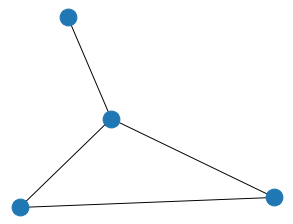

<Figure size 432x288 with 0 Axes>

In [ ]:
import networkx
import matplotlib.pyplot as plt
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)
G = networkx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (2, 4)])

print (networkx.single_source_shortest_path(G, 1))

networkx.draw(G)
plt.show()
plt.savefig("out.png")

In [ ]:
from __future__ import generators


class priorityDictionary(dict):
    def __init__(self):
        '''Initialize priorityDictionary by creating binary heap of
        pairs (value,key). Note that changing or removing a dict entry
        will not remove the old pair from the heap until it is found by
        smallest() or until the heap is rebuilt.'''
        self.__heap = []
        dict.__init__(self)

    def smallest(self):
        '''Find smallest item after removing deleted items from front of
        heap.'''
        if len(self) == 0:
            raise IndexError("smallest of empty priorityDictionary")
        heap = self.__heap
        while heap[0][1] not in self or self[heap[0][1]] != heap[0][0]:
            lastItem = heap.pop()
            insertionPoint = 0
            while 1:
                smallChild = 2 * insertionPoint + 1
                if smallChild + 1 < len(heap) and \
                        heap[smallChild] > heap[smallChild + 1]:
                    smallChild += 1
                if smallChild >= len(heap) or lastItem <= heap[smallChild]:
                    heap[insertionPoint] = lastItem
                    break
                heap[insertionPoint] = heap[smallChild]
                insertionPoint = smallChild
        return heap[0][1]

    def __iter__(self):
        '''Create destructive sorted iterator of priorityDictionary.'''
        def iterfn():
            while len(self) > 0:
                x = self.smallest()
                yield x
                del self[x]
        return iterfn()

    def __setitem__(self, key, val):
        '''Change value stored in dictionary and add corresponding pair
        to heap. Rebuilds the heap if the number of deleted items gets
        large, to avoid memory leakage.'''
        dict.__setitem__(self, key, val)
        heap = self.__heap
        if len(heap) > 2 * len(self):
            self.__heap = [(v, k) for k, v in self.items()]
            self.__heap.sort()
            # builtin sort probably faster than O(n)-time heapify
        else:
            newPair = (val, key)
            insertionPoint = len(heap)
            heap.append(None)
            while insertionPoint > 0 and \
                    newPair < heap[(insertionPoint - 1) // 2]:
                heap[insertionPoint] = heap[(insertionPoint - 1) // 2]
                insertionPoint = (insertionPoint - 1) // 2
            heap[insertionPoint] = newPair

    def setdefault(self, key, val):
        '''Reimplement setdefault to pass through our customized __setitem__.'''
        if key not in self:
            self[key] = val
        return self[key]

In [ ]:
#from priodict import priorityDictionary
def Dijkstra(G, start, end=None):
    """
    Find shortest paths from the  start vertex to all vertices nearer
    than or equal to the end.

    The input graph G is assumed to have the following representation: A
    vertex can be any object that can be used as an index into a
    dictionary. G is a dictionary, indexed by vertices.  For any vertex
    v, G[v] is itself a dictionary, indexed by the neighbors of v.  For
    any edge v->w, G[v][w] is the length of the edge. This is related to
    the representation in <http://www.python.org/doc/essays/graphs.html>
    where Guido van Rossum suggests representing graphs as dictionaries
    mapping vertices to lists of outgoing edges, however dictionaries of
    edges have many advantages over lists: they can store extra
    information (here, the lengths), they support fast existence tests,
    and they allow easy modification of the graph structure by edge
    insertion and removal. Such modifications are not needed here but
    are important in many other graph algorithms. Since dictionaries
    obey iterator protocol, a graph represented as described here could
    be handed without modification to an algorithm expecting Guido's
    graph representation.

    Of course, G and G[v] need not be actual Python dict objects, they
    can be any other type of object that obeys dict protocol, for
    instance one could use a wrapper in which vertices are URLs of web
    pages and a call to G[v] loads the web page and finds its outgoing
    links.

    The output is a pair (D,P) where D[v] is the distance from start to
    v and P[v] is the predecessor of v along the shortest path from s to
    v.

    Dijkstra's algorithm is only guaranteed to work correctly when all
    edge lengths are positive. This code does not verify this property
    for all edges (only the edges examined until the end vertex is
    reached), but will correctly compute shortest paths even for some
    graphs with negative edges, and will raise an exception if it
    discovers that a negative edge has caused it to make a mistake.
    """

    D = {}  # dictionary of final distances
    P = {}  # dictionary of predecessors
    Q = priorityDictionary()  # estimated distances of non-final vertices
    Q[start] = 0

    for v in Q:
        D[v] = Q[v]
        if v == end:
            break

        for w in G[v]:
            vwLength = D[v] + G[v][w]
            if w in D:
                if vwLength < D[w]:
                    raise ValueError("Dijkstra: found better path to already-final vertex")
            elif w not in Q or vwLength < Q[w]:
                Q[w] = vwLength
                P[w] = v

    return (D, P)


def shortestPath(G, start, end):
    """
    Find a single shortest path from the given start vertex to the given
    end vertex. The input has the same conventions as Dijkstra(). The
    output is a list of the vertices in order along the shortest path.
    """

    D, P = Dijkstra(G, start, end)
    Path = []
    while 1:
        Path.append(end)
        if end == start:
            break
        end = P[end]
    Path.reverse()
    return Path

# example, CLR p.528
G = {'s': {'u':10, 'x':5},
    'u': {'v':1, 'x':2},
    'v': {'y':4},
    'x':{'u':3,'v':9,'y':2},
    'y':{'s':7,'v':6}}

print(Dijkstra(G,'s'))
print(shortestPath(G,'s','v'))

({'s': 0, 'x': 5, 'y': 7, 'u': 8, 'v': 9}, {'u': 'x', 'x': 's', 'v': 'u', 'y': 'x'})
['s', 'x', 'u', 'v']


In [ ]:

from __future__ import generators

def orientation(p,q,r):
    '''Return positive number if p-q-r are clockwise, neg if ccw, zero if colinear.'''
    return (q[1]-p[1])*(r[0]-p[0]) - (q[0]-p[0])*(r[1]-p[1])

def hulls(Points):
    '''Graham scan to find upper and lower convex hulls of a set of 2d points.'''
    U = []
    L = []
    Points.sort()
    for p in Points:
        while len(U) > 1 and orientation(U[-2],U[-1],p) <= 0: U.pop()
        while len(L) > 1 and orientation(L[-2],L[-1],p) >= 0: L.pop()
        U.append(p)
        L.append(p)
    return U,L

# U,L = hulls([(0,0),(1,1),(0,1),(1,0),(1,3),(3,1),(2,2)])
# returns
# U = [(0, 0), (0, 1), (1, 3), (3, 1)]
# L = [(0, 0), (1, 0), (3, 1)]

def rotatingCalipers(Points):
    '''Given a list of 2d points, finds all ways of sandwiching the points between
two parallel lines that touch one point each, and yields the sequence of pairs of
points touched by each pair of lines.'''
    U,L = hulls(Points)
    i = 0
    j = len(L) - 1
    while i < len(U) - 1 or j > 0:
        yield U[i],L[j]
        
        # if all the way through one of top or bottom, advance the other
        if i == len(U) - 1: j -= 1
        elif j == 0: i += 1
        
        # still points left on both lists, compare slopes of next hull edges
        elif (U[i+1][1]-U[i][1])*(L[j][0]-L[j-1][0]) > \
                (L[j][1]-L[j-1][1])*(U[i+1][0]-U[i][0]):
            i += 1
        else: j -= 1

# rotatingCalipers([(0,0),(1,1),(0,1),(1,0),(1,3),(3,1),(2,2)])
# yields:
# (0, 0) (3, 1)
# (0, 1) (3, 1)
# (1, 3) (3, 1)
# (1, 3) (1, 0)
# (1, 3) (0, 0)

def diameter(Points):
    '''Given a list of 2d points, returns the pair that's farthest apart.'''
    bestPair = None
    bestDist = 0
    def square(x): return x*x
    for p,q in rotatingCalipers(Points):
        dist = square(q[0]-p[0]) + square(q[1]-p[1])
        if dist > bestDist:
            bestDist = dist
            bestPair = (p,q)
    return bestPair

diameter([(0,0),(1,1),(0,1),(1,0),(1,3),(3,1),(2,2)])
# returns: ((0, 0), (3, 1))

((0, 0), (3, 1))

In [ ]:
import math
from collections import defaultdict

graph = { 
          'S': ['A'],
          'A': ['B'],
          'B': ['C', 'E'],
          'C': ['A', 'D'],
          'D': [],
          'E': []
        }

vertex_to_idx = { 
          'S': 0,
          'A': 1,
          'B': 2,
          'C': 3,
          'D': 4,
          'E': 5
        }

weights = { 
          'S': {'A': 6},
          'A': {'B': 3},
          'B': {'C': 4, 'E': 5},
          'C': {'A': -3, 'D': 3},
          'D': {},
          'E': {}
        }

num_edges = 0
num_vertices = 0
reversed_graph = defaultdict(list)
for vertex, edges in graph.items():
  num_edges += len(edges)
  num_vertices += 1
  for edge in edges:
    # Reversing the graph so we can later find which
    # the vertices directly lead to a particular vertex
    reversed_graph[edge].append(vertex)

d = [[math.inf for x in range(num_vertices)] for y in range(num_edges + 1)] 
d[0][vertex_to_idx['S']] = 0

for i in range(1, num_edges):
  for z in graph.keys():
    z_idx = vertex_to_idx[z]

    # Initialize the shortest path to z to the
    # path found in the previous subproblem.
    # Only update if new paths are shorter
    d[i][z_idx] = d[i-1][z_idx]

    # The reversed graph lets us find which vertexes
    # immediately lead to z
    for y in reversed_graph[z]:
      y_idx = vertex_to_idx[y]
      if d[i][z_idx] > (d[i-1][y_idx] + weights[y][z]):
        d[i][z_idx] = d[i-1][y_idx] + weights[y][z]

print()
print("The memoization table (with headers):")
header_row = ['TBD'] * num_vertices
for vertex, idx in vertex_to_idx.items():
  header_row[idx] = vertex

print(header_row)
for i in range(0, num_edges):
  print(d[i])

print()
print("Final shortest paths to each vertex:")
print(d[num_edges - 1])


The memoization table (with headers):
['S', 'A', 'B', 'C', 'D', 'E']
[0, inf, inf, inf, inf, inf]
[0, 6, inf, inf, inf, inf]
[0, 6, 9, inf, inf, inf]
[0, 6, 9, 13, inf, 14]
[0, 6, 9, 13, 16, 14]
[0, 6, 9, 13, 16, 14]

Final shortest paths to each vertex:
[0, 6, 9, 13, 16, 14]
